In [84]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
import seaborn as sns


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from torch.utils.data import DataLoader, TensorDataset


In [85]:
data = pd.read_csv("../data/train.csv")
submission_data = pd.read_csv("../data/test.csv")

In [86]:
data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [87]:
submission_data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [88]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,70349.500000,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,40616.735775,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,0.000000,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,35174.750000,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,70349.500000,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,105524.250000,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,140699.000000,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [89]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [90]:
print(data.isnull().sum())
print(data.isna().sum())

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64
id                         

In [91]:
# Fill missing values with appropriate values
data["Academic Pressure"] = data["Academic Pressure"].fillna(0)  # Fill with 0 for students without academic pressure
data["Work Pressure"] = data["Work Pressure"].fillna(0)  # Fill with 0 for students without work pressure
data["Financial Stress"] = data["Financial Stress"].fillna(data["Financial Stress"].mean())  # Fill with mean for financial stress

# Calculate stress level
data["Total_Stress"] = data["Academic Pressure"] + data["Work Pressure"] + data["Financial Stress"]
data["Total_Stress"].describe()

count    140700.000000
mean          6.015941
std           2.042066
min           1.000000
25%           5.000000
50%           6.000000
75%           7.000000
max          10.000000
Name: Total_Stress, dtype: float64

In [92]:
data["Age x Total_Stress"] = data["Age"] * data["Total_Stress"]
data["Age x Total_Stress"].describe()

count    140700.000000
mean        239.781107
std         106.900680
min          20.000000
25%         159.000000
50%         225.000000
75%         308.000000
max         600.000000
Name: Age x Total_Stress, dtype: float64

In [93]:
numeric_features = data.select_dtypes(include=[np.number])

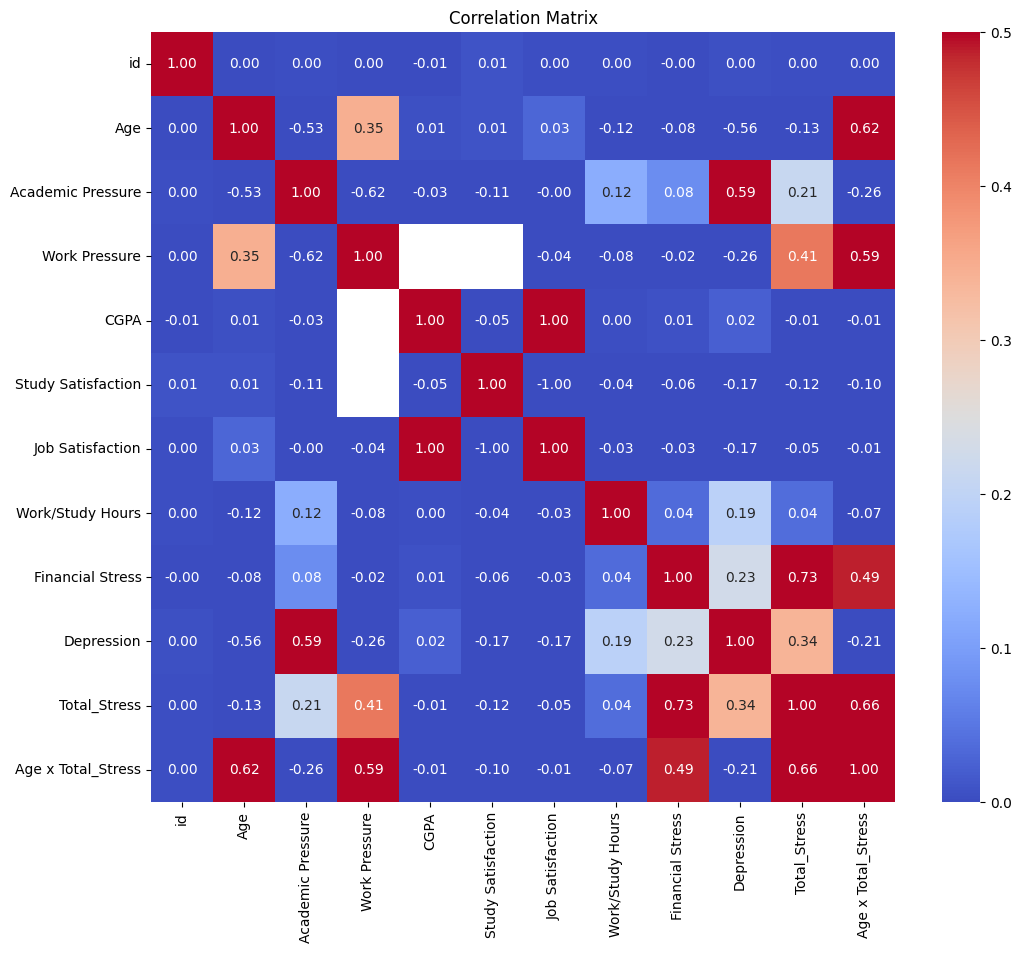

In [94]:
corr_matrix = numeric_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f" ,cmap='coolwarm', vmin=0, vmax=0.5)
plt.title('Correlation Matrix')
plt.show()

In [95]:
print(data['Dietary Habits'].unique())
print(data['Sleep Duration'].unique())

['Healthy' 'Unhealthy' 'Moderate' 'Yes' 'Pratham' 'BSc' 'Gender' '3'
 'More Healthy' 'Less than Healthy' 'Mihir' '1.0' 'Hormonal' 'Electrician'
 nan 'No Healthy' 'Less Healthy' 'M.Tech' 'Vegas' 'No' 'Male' 'Indoor'
 'Class 12' '2']
['More than 8 hours' 'Less than 5 hours' '5-6 hours' '7-8 hours'
 'Sleep_Duration' '1-2 hours' '6-8 hours' '4-6 hours' '6-7 hours'
 '10-11 hours' '8-9 hours' '40-45 hours' '9-11 hours' '2-3 hours'
 '3-4 hours' 'Moderate' '55-66 hours' '4-5 hours' '9-6 hours' '1-3 hours'
 'Indore' '45' '1-6 hours' '35-36 hours' '8 hours' 'No' '10-6 hours'
 'than 5 hours' '49 hours' 'Unhealthy' 'Work_Study_Hours' '3-6 hours'
 '45-48 hours' '9-5' 'Pune' '9-5 hours']


/var/folders/wj/5qrhlndn72db_63qyvwsfh440000gn/T/ipykernel_12852/2413456333.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Dietary Habits', palette='viridis')


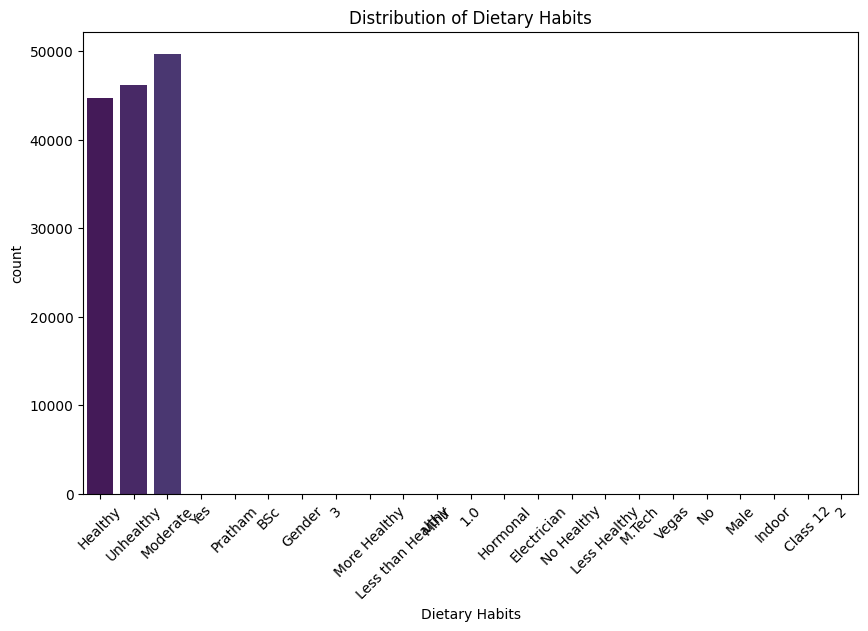

Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

In [96]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Dietary Habits', palette='viridis')
plt.title('Distribution of Dietary Habits')
plt.xticks(rotation=45)
plt.show()

data['Dietary Habits'].value_counts()


/var/folders/wj/5qrhlndn72db_63qyvwsfh440000gn/T/ipykernel_12852/1634800544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Sleep Duration', palette='viridis')


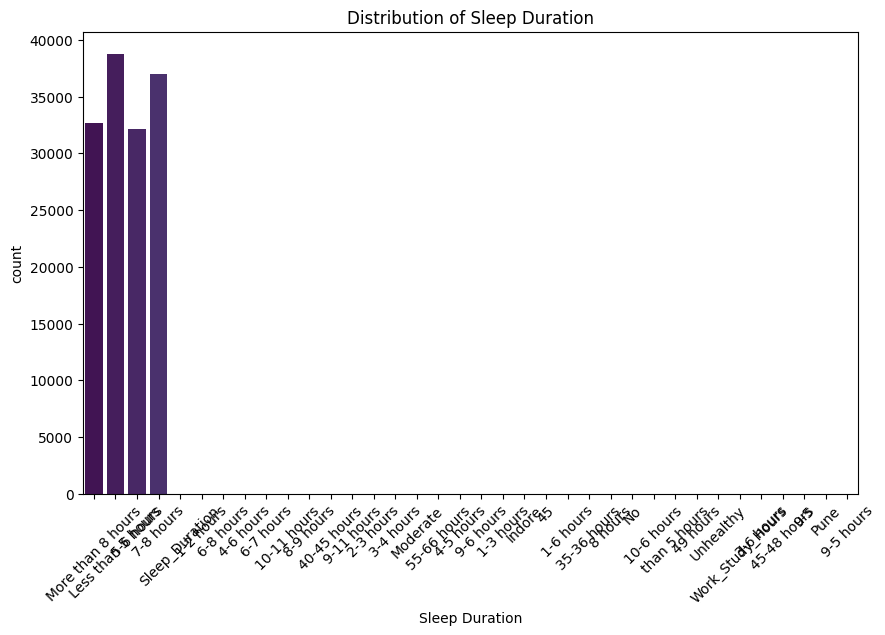

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

In [97]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Sleep Duration', palette='viridis')
plt.title('Distribution of Sleep Duration')
plt.xticks(rotation=45)
plt.show()

data['Sleep Duration'].value_counts()

In [98]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data["Depression"])
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 112560 entries, 3429 to 127176
Data columns (total 22 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     112560 non-null  int64  
 1   Name                                   112560 non-null  object 
 2   Gender                                 112560 non-null  object 
 3   Age                                    112560 non-null  float64
 4   City                                   112560 non-null  object 
 5   Working Professional or Student        112560 non-null  object 
 6   Profession                             83154 non-null   object 
 7   Academic Pressure                      112560 non-null  float64
 8   Work Pressure                          112560 non-null  float64
 9   CGPA                                   22373 non-null   float64
 10  Study Satisfaction                     22371 non-null   fl

In [99]:
data["Degree"].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
       'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
       'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
       'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
   

In [100]:
drop_columns = ['id', 'Name']
train_data = train_data.drop(columns=drop_columns)
test_data = test_data.drop(columns=drop_columns)

In [101]:
numeric_features = train_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = train_data.select_dtypes(include=['object']).columns.tolist()
print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)

Numeric Features: ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression', 'Total_Stress', 'Age x Total_Stress']
Categorical Features: ['Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']


In [102]:
# Define preprocessing pipelines
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
])

In [103]:
combined_features = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features),
    ],
    remainder='passthrough'  # Keep any remaining columns not specified
)

In [104]:
# clean diatary habits
valid_diatary_habits = ['Healthy', 'Moderately Healthy', 'Unhealthy']
default_dietary_habit = 'Moderately Healthy'
train_data['Dietary Habits'] = train_data['Dietary Habits'].apply(lambda x: x if x in valid_diatary_habits else default_dietary_habit)
test_data['Dietary Habits'] = test_data['Dietary Habits'].map(lambda x: x if x in valid_diatary_habits else default_dietary_habit)

# clean sleep duration
valid_sleep_durations = ['Less than 5 hours', '7-8 hours', 'More than 8 hours', '5-6 hours']
default_sleep_duration = '7-8 hours'
train_data['Sleep Duration'] = train_data['Sleep Duration'].apply(lambda x: x if x in valid_sleep_durations else default_sleep_duration)
test_data['Sleep Duration'] = test_data['Sleep Duration'].map(lambda x: x if x in valid_sleep_durations else default_sleep_duration)

In [105]:
# Define categories for ordinal encoding
ordinal_categories = [
    ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours'],
    ['Unhealthy', 'Moderately Healthy', 'Healthy']
]

# convert categorical columns to numerical
onehot_list = ['Gender', 'City', 'Working Professional or Student', 'Profession', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
ordinal_list = ['Sleep Duration', 'Dietary Habits']

# add preprocessor for one-hot and ordinal encoding
preprocessor = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_list),
    ('ordinal', OrdinalEncoder(categories=ordinal_categories), ordinal_list)
])

In [106]:
# Split in features and labels
X_train_data = train_data.drop(columns=['Depression'])
Y_train_data = train_data['Depression']

X_test_data = test_data.drop(columns=['Depression'])
Y_test_data = test_data['Depression']

In [107]:
X_train_data.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Total_Stress,Age x Total_Stress
3429,Female,25.0,Kolkata,Student,NaN,5.0,0.0,5.59,5.0,NaN,Less than 5 hours,Moderately Healthy,ME,Yes,8.0,5.0,No,10.0,250.0
57741,Female,20.0,Delhi,Student,NaN,3.0,0.0,8.27,4.0,NaN,5-6 hours,Unhealthy,Class 12,No,0.0,1.0,Yes,4.0,80.0
83234,Male,24.0,Vadodara,Student,NaN,3.0,0.0,6.00,2.0,NaN,More than 8 hours,Healthy,B.Com,No,3.0,1.0,Yes,4.0,96.0
136573,Female,38.0,Kolkata,Working Professional,Content Writer,0.0,1.0,NaN,NaN,3.0,Less than 5 hours,Moderately Healthy,M.Ed,No,10.0,2.0,Yes,3.0,114.0
93261,Female,24.0,Ahmedabad,Student,NaN,4.0,0.0,8.04,4.0,NaN,More than 8 hours,Healthy,B.Arch,Yes,10.0,3.0,Yes,7.0,168.0


In [108]:
# Fit and transform the training data, transform the test data
X_train_encoded = preprocessor.fit_transform(X_train_data)    
X_test_encoded = preprocessor.transform(X_test_data)

In [109]:
# Convert DataFrames to tensors
X_train_tensor = torch.tensor(X_train_encoded, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train_data.values, dtype=torch.long)

X_test_tensor = torch.tensor(X_test_encoded, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test_data.values, dtype=torch.long)

In [110]:
# Create DataLoader
batch_size = 64
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False)
